<a href="https://colab.research.google.com/github/etexaco123/NLP_Challenge/blob/main/NLP_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This NLP challenge contains IMDB Dataset of 50K Movie Reviews to perform Sentiment analysis

In [1]:
'''
1-First download the dataset from kaggle and load it in the google collab there are also alternative ways to do this
2-Mountiung of the gdrive 
3-Import the python libraries to process the dataset and apply machine learning techniques

'''

'\n1-First download the dataset from kaggle and load it in the google collab there are also alternative ways to do this\n2-Mountiung of the gdrive \n3-Import the python libraries to process the dataset and apply machine learning techniques\n\n'

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [48]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
import re,string,unicodedata
import nltk
from sklearn.svm import SVC
nltk.download('stopwords')
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
# from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
path = "/content/drive/MyDrive/kaggle/archive.zip"

In [4]:
df = pd.read_csv("/content/drive/MyDrive/kaggle/IMDB Dataset.csv")
df2 = df

# New section

In [5]:
# We analyze the dataset
df2.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [6]:
df2.value_counts('sentiment')

sentiment
negative    25000
positive    25000
dtype: int64

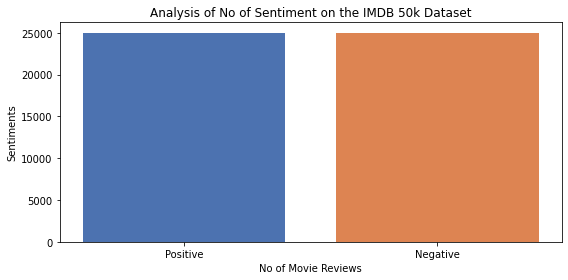

In [7]:
colors = sns.color_palette('deep')

plt.figure(figsize=(8,4), tight_layout=True)
plt.bar(x=['Positive', 'Negative'],
        height=df.value_counts(['sentiment']),
        color=colors[:2])
plt.title('Analysis of No of Sentiment on the IMDB 50k Dataset')
plt.xlabel('No of Movie Reviews')
plt.ylabel('Sentiments')
plt.savefig('sentiment.png')
plt.show()



In [ ]:
# We can see that the dataset is balanced and we can alo see that we have html tags

In [8]:
df2.shape

(50000, 2)

I will be cleaning up the dataset of stopwords and remove the html tags

In [9]:
'''
Preprocessing Pipeline to remove html tags, special characters, stopwords
'''

#Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    
    return text
#Apply function on review column
# df['review']=df['review'].apply(denoise_text)

#Define function for removing special characters
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text
#Apply function on review column

# #removing the stopwords
# def remove_stopwords(text, is_lower_case=False):
#     tokens = tokenizer.tokenize(text)
#     tokens = [token.strip() for token in tokens]
#     if is_lower_case:
#         filtered_tokens = [token for token in tokens if token not in stopword_list]
#     else:
#         filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
#     filtered_text = ' '.join(filtered_tokens)    
#     return filtered_text

#Stemming the text
def simple_stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text
#Apply function on review column
# df2['review']=df2['review'].apply(simple_stemmer)



#Stemming the text
def simple_stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text


# remove stop-words and punctuations
def remove_stopwords(sentence):
    stop_words = set(stopwords.words('english'))
    sentence = sentence.lower()
    tokens = sentence.split()
    filtered_tokens = [token.strip(string.punctuation) for token in tokens if token.lower() not in stop_words]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text



Apply preprocessing pipeline to the dataframe

In [10]:
# Apply the preproprocessing pipeline to the dataframe
df2['review']=df2['review'].apply(denoise_text) # strip the html and remove square brackets

In [11]:
# Remove special characters
df2['review']=df2['review'].apply(remove_special_characters)

In [12]:
df2

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production The filming tech...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically theres a family where a little boy J...,negative
4,Petter Matteis Love in the Time of Money is a ...,positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,Bad plot bad dialogue bad acting idiotic direc...,negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,Im going to have to disagree with the previous...,negative


In [13]:
#Apply potter stemming to perform lemmatization
# df2['review']=df2['review'].apply(simple_stemmer)
# df2.head()
# df2['review'].apply(simple_stemmer)

0        one of the other review ha mention that after ...
1        a wonder littl production. <br /><br />the fil...
2        i thought thi wa a wonder way to spend time on...
3        basic there' a famili where a littl boy (jake)...
4        petter mattei' "love in the time of money" is ...
                               ...                        
49995    i thought thi movi did a down right good job. ...
49996    bad plot, bad dialogue, bad acting, idiot dire...
49997    i am a cathol taught in parochi elementari sch...
49998    i'm go to have to disagre with the previou com...
49999    no one expect the star trek movi to be high ar...
Name: review, Length: 50000, dtype: object

In [31]:
# remove stopwords
# df2['review']=df2['review'].apply(remove_stopwords)

In [13]:
# Segmentation of dataset into 80% training and 20% test set
train,test = train_test_split(df2,test_size =0.2,random_state=42)
train_x, train_y = train['review'], train['sentiment']
test_x, test_y = test['review'], test['sentiment']

Transformed the text to numeric vectors which the machine can understand using bag of words (BOW) using in the form of Term frequency -Inverse Document Frequency (TF-IDF).

In [14]:
#transformation of the data into numeric vectors using TF-IDF
tfidf = TfidfVectorizer(stop_words='english')
train_x_vector = tfidf.fit_transform(train_x)
# also fit the test_x_vector
test_x_vector = tfidf.transform(test_x)

In [15]:
pd.DataFrame.sparse.from_spmatrix(train_x_vector,
                                  index=train_x.index,
                                  columns=tfidf.get_feature_names_out())

,00,000,00000001,000001,0001,00015,001,0010,002,00383042,...,zzzz,zzzzip,zzzzz,zzzzzs,zzzzzzzz,zzzzzzzzz,zzzzzzzzzzzz,zzzzzzzzzzzzz,zzzzzzzzzzzzzzzzzz,zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz
39087,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30893,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45278,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13653,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
44732,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38158,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
860,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
# Using support vector machines (SVC)to fit the trnsformed vector
svc = SVC(kernel='linear')
svc.fit(train_x_vector, train_y)

SVC(kernel='linear')

In [25]:
svc.predict(tfidf.transform(test_x))


array(['positive', 'positive', 'negative', ..., 'positive', 'negative',
       'positive'], dtype=object)

In [21]:
print(svc.score(test_x_vector, test_y))

0.8956


In [26]:
conf_mat = confusion_matrix(test_y,
                           svc.predict(test_x_vector),
                           labels = ['positive', 'negative'])


In [31]:
class_names = df.columns
class_names

Index(['review', 'sentiment'], dtype='object')

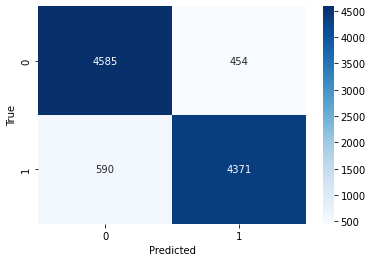

In [33]:
# Plot the confusion matrix as a heatmap
sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [37]:
# Concatenate the dataframes
df_test = pd.concat([test_x, test_y], axis=1)
df_test.head()

,review,sentiment
33553,I really liked this Summerslam due to the look...,positive
9427,Not many television shows appeal to quite as m...,positive
199,The film quickly gets to a major chase scene w...,negative
12447,Jane Austen would definitely approve of this o...,positive
39489,Expectations were somewhat high for me when I ...,negative


In [43]:
df_test.tail()

,review,sentiment
28567,Although Casper van Dien and Michael Rooker ar...,negative
25079,I liked this movie I wasnt really sure what it...,positive
18707,Yes nonSingaporeans cant see whats the big dea...,positive
15200,As far as films go this is likable enough Ente...,negative
5857,I saw Anatomy years ago dubbed at a friends h...,positive


In [40]:
df_test['review'][39489]

'Expectations were somewhat high for me when I went to see this movie after all I thought Steve Carell could do no wrong coming off of great movies like Anchorman The 40 YearOld Virgin and Little Miss Sunshine Boy was I wrongIll start with what is right with this movie at certain points Steve Carell is allowed to be Steve Carell There are a handful of moments in the film that made me laugh and its due almost entirely to him being given the wiggleroom to do his thing Hes an undoubtedly talented individual and its a shame that he signed on to what turned out to be in my opinion a total trainwreckWith that out of the way Ill discuss what went horrifyingly wrongThe film begins with Dan Burns a widower with three girls who is being considered for a nationally syndicated advice column He prepares his girls for a family reunion where his extended relatives gather for some time with each otherThe family is high atop the list of things that make this an awful movie No family behaves like this I

In [42]:
svc.predict(tfidf.transform([df_test['review'][39489]]))

array(['negative'], dtype=object)

In [47]:
# applying model on a sample testset test 
print(df_test['review'][5857] , svc.predict(tfidf.transform([df_test['review'][5857]])))

I saw Anatomy years ago  dubbed at a friends house I dont remember it much and then I saw at the video store there is a second one  not really related to the first one Franka Ponte makes a little cameo And that one was okay not as good as the first one Im seeing the first one again tonight  not dubbed collectors edition I really like German movies like this one its very interesting and people and cults like the one in the movie could exist i think i dunno But its very grossly entertaining and scary Anatomy 2 is a little different and the characters are not as good as the first But if you really thought Anatomy was interesting and good you should see the second one ['positive']


In [49]:
#Ploting the classification report
print(classification_report(test_y,
                            svc.predict(test_x_vector),
                            labels = ['positive','negative']))

              precision    recall  f1-score   support

    positive       0.89      0.91      0.90      5039
    negative       0.91      0.88      0.89      4961

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

